#NEURAL NETWORK AND BACKPROPAGATION

we want to copy human brain

#single linear perceptron

or : one of them strong (1,0) => worked

and : have both (1,1) -> worked

NAND : both factor not strong

=> 1 , 0 = worked
=> 1, 1 = not worked


XOR : chi ok khi 1 trong 2 tk manh

                                 

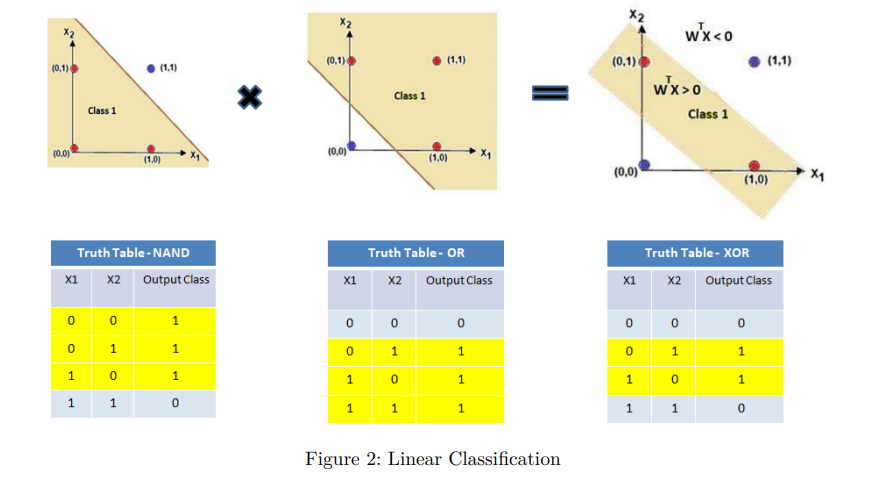

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['axes.grid'] = True
import warnings
warnings.filterwarnings("ignore")


In [ ]:


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])
y_nand = np.array([1, 1, 1, 0])


#Percepton for binary classification

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron()
model.fit (X,y_and)

print(model.score(X,y_and))

1.0


In [ ]:
model = Perceptron()
model.fit (X,y_xor)

print(model.score(X,y_and))

0.75


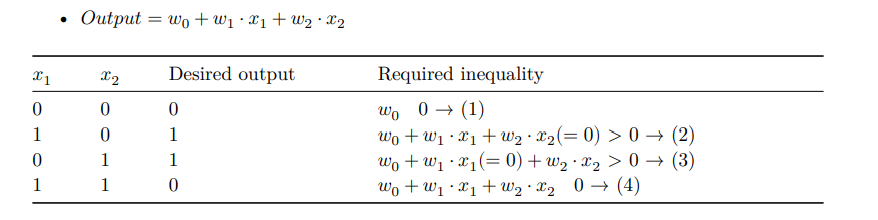

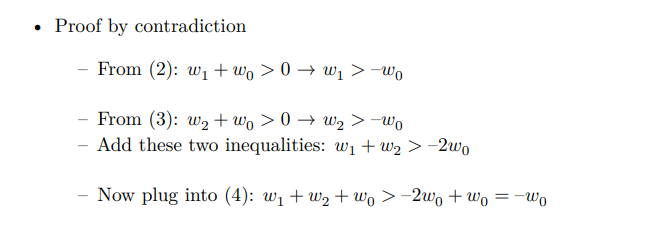

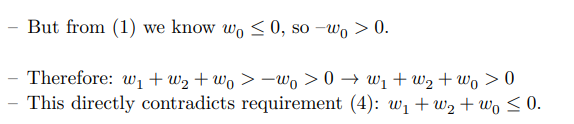

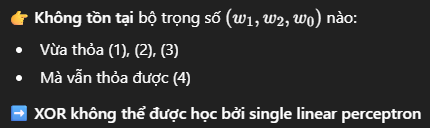

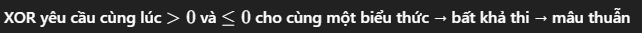

Sigmoid dùng làm activation function, quyết định neuron bật (≈1) hay tắt (≈0) dựa trên đầu vào
𝑧
z.

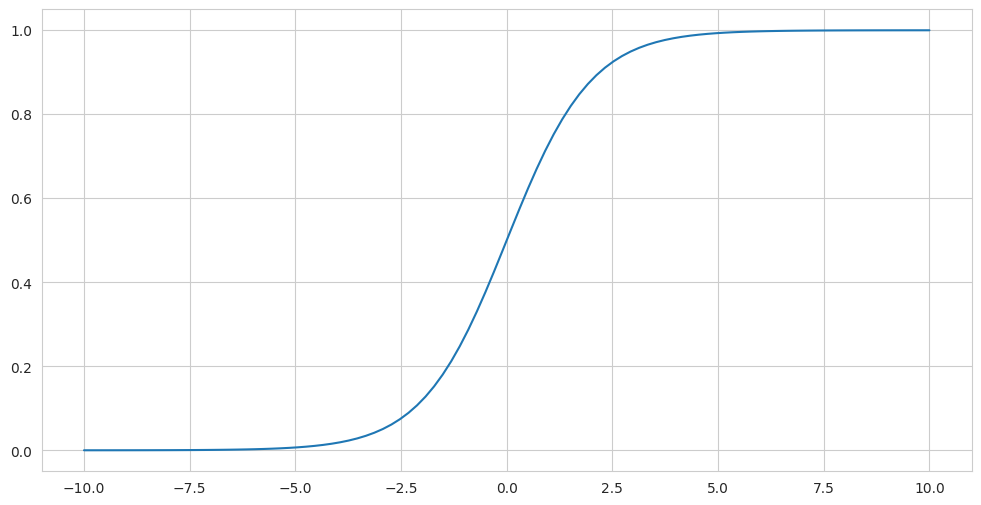

In [ ]:
x = np.linspace(-10,10,100)
sigmoid = lambda z: 1/ (1+np.exp(-z))
plt.plot(x,sigmoid(x));

Perceptron tuyến tính ⇒ chỉ vẽ được 1 đường thẳng

Muốn tách XOR ⇒ phải “bẻ cong” không gian, điểm 1 nằm chéo nhau

⇒ cần non-linear activation (sigmoid, ReLU, …)

# HOW NON LINEARITY TO PERCEPTRON

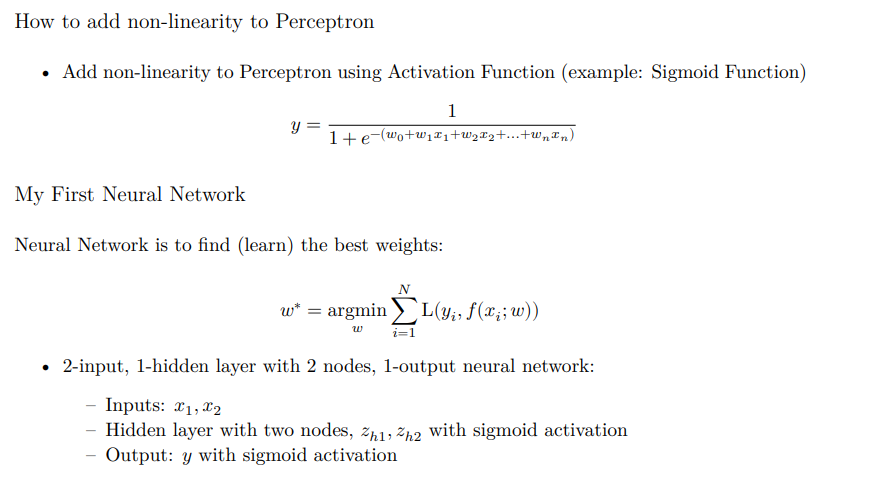

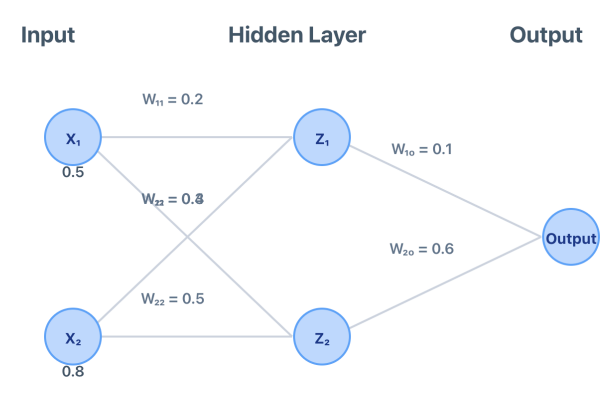

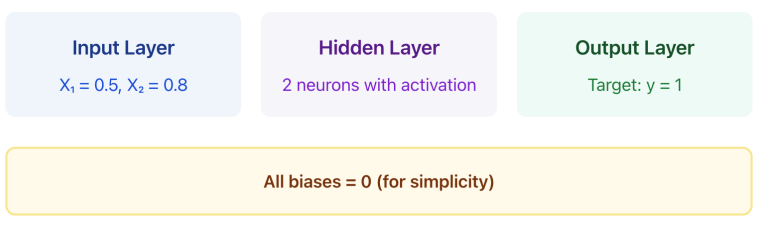

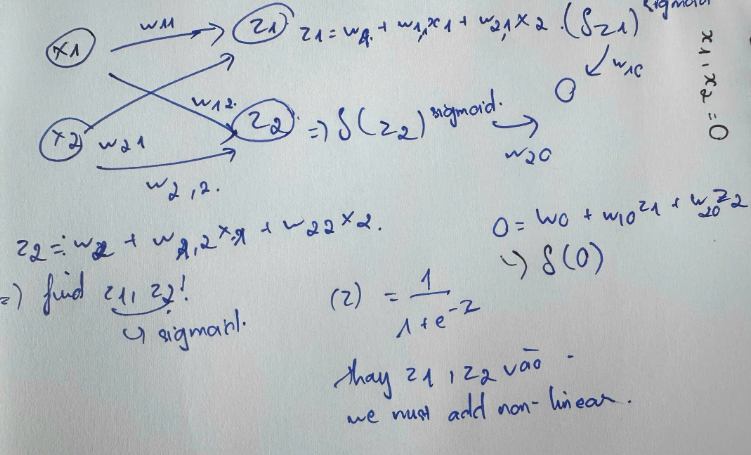

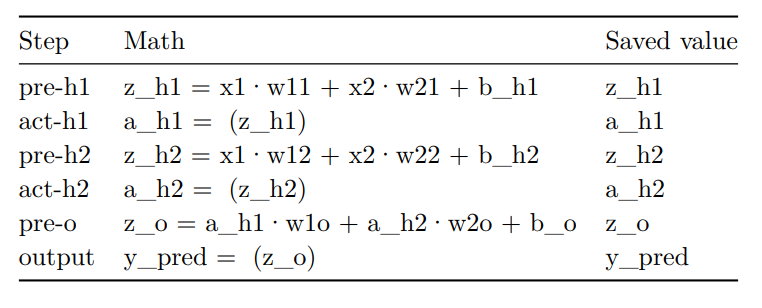

In [ ]:
x1 = 0.5
x2 = 0.8

y_target = 1.0

#weights
w11 = 0.2
w21 = 0.4

w12 = 0.3
w22 = 0.5

w1o = 0.1
w2o = 0.6

b_h1,b_h2,b_o1 = 0.0, 0.0 , 0.0 #bias


In [ ]:
#h1

h1 = b_h1 + w11*x1 + w21*x2
z_h1 = sigmoid(h1)

In [ ]:
h1

0.42000000000000004

In [ ]:
z_h1 = sigmoid(h1)
z_h1

np.float64(0.6034832498647263)

In [ ]:
h2 = b_h1 + w12*x1 + w22*x2
z_h2 = sigmoid(h2)

In [ ]:
print(h2)
print(z_h2)

0.55
0.6341355910108007


#Calculate output layer node 01

In [ ]:
oo = b_o1 + w1o*z_h1 + w2o*z_h2
oo

np.float64(0.44082967959295305)

In [ ]:
y_pred = sigmoid(oo)
y_pred

np.float64(0.6084567090183433)

In [ ]:
#Error: MSE
error = y_target - y_pred

In [ ]:
error

np.float64(0.39154329098165674)

In [ ]:
mse = (error)**2
mse

np.float64(0.15330614871274634)

#BACKRPOPAGATION


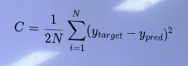

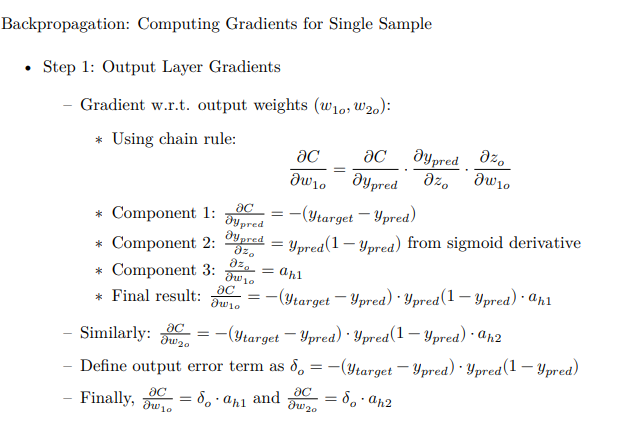

Thay đổi weight ở output layer thì cost thay đổi bao nhiêu
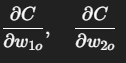


https://chatgpt.com/s/t_696d9bc8fc948191aecb68ce266f1642 (derivative methods)


#DEFINE OUTPUT ERROR TERM


In [ ]:
delta_o = -(y_target-y_pred)*y_pred*(1-y_pred)
delta_o

np.float64(-0.09328015471803436)

In [ ]:
cw1o = delta_o * z_h1
cw2o = delta_o * z_h2

In [ ]:
print(cw1o)
print(cw2o)

-0.05629301091712386
-0.05915226604169965


#HIDEEN LAYER GRADIENTS

In [ ]:
c_w11 = delta_o * w1o * z_h1 * (1-z_h1) * x1
c_w12 = delta_o * w2o * z_h1 * (1-z_h1) * x2


c_w21 = delta_o * w2o * z_h2 * (1-z_h2) * x1
c_w22 = delta_o * w2o * z_h2 * (1-z_h2) * x2
#z_h1 = a_h1

In [ ]:
print(c_w11 ,c_w12,c_w21,c_w22)

-0.0011160560872093717 -0.010714138437209968 -0.006492512656715496 -0.010388020250744794


take

Key Optimization Algorithms

#BACKPROPAGATION ALGORITHM SUMMARY

In [ ]:
learning_rate = 0.1

w1o_new = w1o - learning_rate * cw1o
w2o_new = w2o - learning_rate * cw1o

 #cw1o ,cw20

w11_new = w11 - learning_rate * c_w11
w12_new = w12 - learning_rate * c_w12


w21_new = w21 - learning_rate * c_w21
w22_new = w22 - learning_rate * c_w22

In [ ]:
# the update version of w
w1o_new,w2o_new,w11_new,w12_new,w21_new,w22_new

(np.float64(0.1056293010917124),
 np.float64(0.6056293010917123),
 np.float64(0.20011160560872096),
 np.float64(0.301071413843721),
 np.float64(0.4006492512656716),
 np.float64(0.5010388020250744))

#RETAKE

In [ ]:
# ======================
# 1. INPUT & TARGET
# ======================
x1 = 0.5
x2 = 0.8
y_target = 1.0

# ======================
# 2. UPDATED WEIGHTS (NEW)
# ======================
# input -> hidden
w11 = 0.20011160560872096
w21 = 0.4006492512656716

w12 = 0.301071413843721
w22 = 0.5010388020250744

# hidden -> output
w1o = 0.1056293010917124
w2o = 0.6056293010917123

# ======================
# 3. BIAS (giữ nguyên)
# ======================
b_h1 = 0.0
b_h2 = 0.0
b_o  = 0.0

# ======================
# 4. SIGMOID
# ======================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ======================
# 5. FORWARD PASS (với weight mới)
# ======================
z_h1 = x1 * w11 + x2 * w21 + b_h1
z_h2 = x1 * w12 + x2 * w22 + b_h2

a_h1 = sigmoid(z_h1)
a_h2 = sigmoid(z_h2)

z_o = a_h1 * w1o + a_h2 * w2o + b_o
y_pred = sigmoid(z_o)

# ======================
# 6. COST (MSE)
# ======================
cost = 0.5 * (y_pred - y_target) ** 2

# ======================
# 7. PRINT RESULT
# ======================
print("y_pred (new):", y_pred)
print("cost (new):", cost)


y_pred (new): 0.6101643612200203
cost (new): 0.07598591263149741


the cost must not always be zero

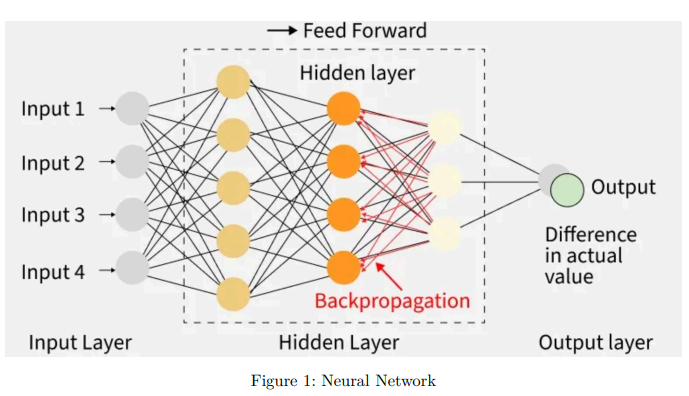

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.27574&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

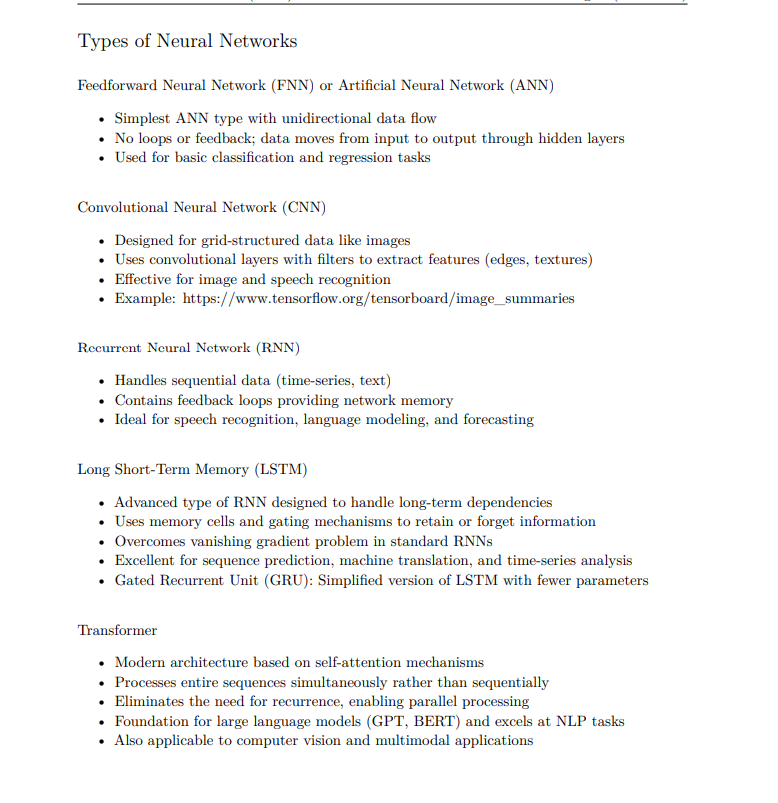

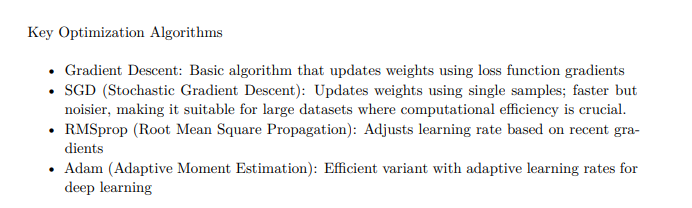

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (12, 8)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Scikit-learn
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
classification_report,
confusion_matrix,
accuracy_score,
ConfusionMatrixDisplay,
r2_score,
mean_squared_error
)

# Tensorflow by Google
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
# Install scikeras to resolve ModuleNotFoundError
!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor


# Pytorch by Meta (Facebook AI)
# import torch
# import torch.nn as nn
# import torch.optim as optim

In [ ]:
# Generate dataset
X, y = make_classification( # 0,1
n_samples=1000,
n_features=20,
n_informative=18,
n_redundant=2,
n_classes=2,
random_state=123
)


In [ ]:
X.shape, y.shape

((1000, 20), (1000,))

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 123)

In [ ]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


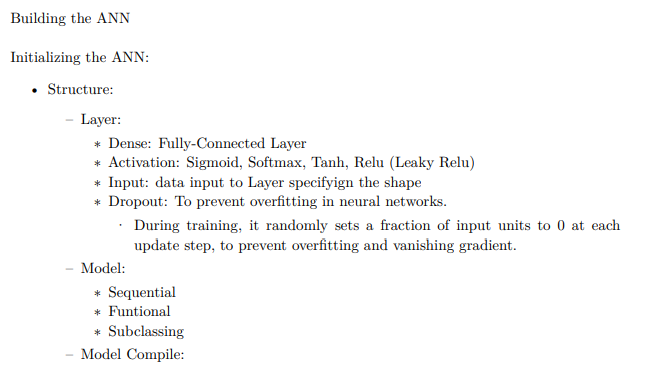

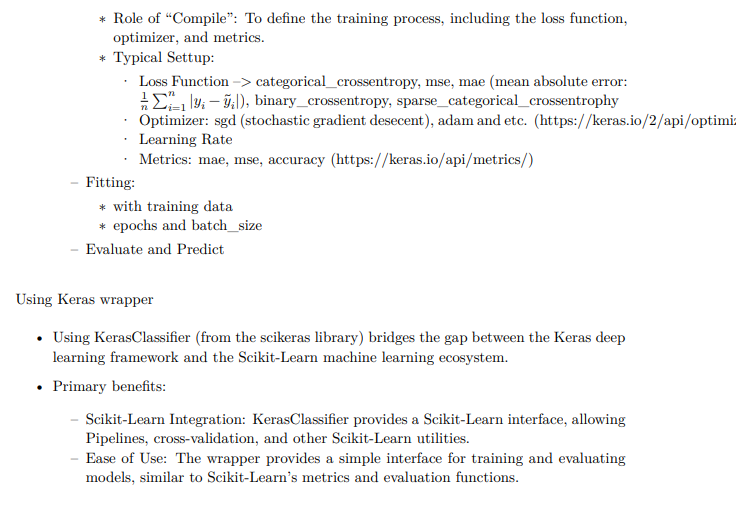

In [ ]:
#set layer first
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train_scaled.shape[1], )), #hidden layer (activation = sigmoid)
    Dense (32, activation = 'relu'), #backpropagation
    Dense (1, activation = 'sigmoid') #output layer (activation = sigmoid)
])


# để tránh overfiting mình sẽ cắt cái network ( hidden layer ) manually

In [ ]:
#set layer first
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_train_scaled.shape[1], )), #hidden layer (activation = sigmoid)
    Dropout(0.2),
    Dense (32, activation = 'relu'), #backpropagation
    Dense (1, activation = 'sigmoid') #output layer (activation = sigmoid)
])


In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01),loss = 'binary_crossentropy',metrics = ['accuracy']) #gradient descent

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Dense (64)
→ nhận 20 input, tạo 64 neuron
→ có 1,344 tham số

Dense (32)
→ nhận 64 đầu vào, tạo 32 neuron
→ 2,080 tham số

Dense (1)
→ output 1 giá trị (thường là xác suất 0/1)
→ 33 tham số

model.fit (model học) , X train dữ liệu đầu vào học-> y train đáp án đúng ,epoch : số lần học bài ,  batch size học bao nhiêu bài  ,verbose : hiện quá trình học hay k?

In [ ]:
my_nn1 = model.fit(X_train_scaled, y_train, epochs=100, batch_size= 32, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.7100 - loss: 0.5471
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8940 - loss: 0.2660
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9241 - loss: 0.1978
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9407 - loss: 0.1722
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9559 - loss: 0.1515
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9503 - loss: 0.1303
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9539 - loss: 0.1358
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9709 - loss: 0.1049
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9699 - loss: 0.0909
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9772 - loss: 0.0661
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9736 - loss: 0.0755
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

In [ ]:
# Predict
# Assuming 'scaler' is the StandardScaler object fitted on X_train
# and 'X_test' is the unscaled test data.
y_pred_nn1 = model.predict(X_test_scaled)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


In [ ]:
np.c_[y_test, y_pred_nn1.round(3)]
#some pred good some bad
# the result is probalbilty : bc we need to keras and scikeras

array([[1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 0.98199999],
       [0.        , 0.97000003],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [1.        , 0.995     ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 0.986     ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 0.08      ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.

In [ ]:
y_pred_class = np.where(y_pred_nn1 > 0.5,1,0)

In [ ]:
np.c_[y_test, y_pred_class]
#this is the one we expect


array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0,

#Keras wrapper

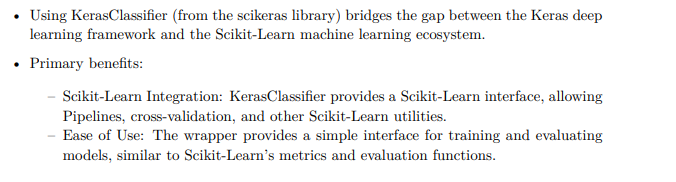

Keras wrapper (KerasClassifier) là cầu nối
→ giúp mô hình Keras
→ làm việc được với hệ sinh thái scikit-learn

Mạng nơ-ron vẫn do Keras dạy
Nhưng cách dùng giống scikit-learn

In [ ]:
def create_model():
  model = Sequential([
      Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
      Dropout(0.2),
      Dense(32,activation ='relu'),
      Dropout(0.2),
      Dense(1, activation="sigmoid")
  ])
  model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
my_nn1_kc = KerasClassifier(model=create_model,epochs=100,batch_size=32,verbose=1)

In [ ]:
my_nn1_kc.fit(X_train_scaled,y_train);

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6737 - loss: 0.5890
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8595 - loss: 0.3426 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2478 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9364 - loss: 0.1992 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.1797 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9478 - loss: 0.1390 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.1448
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.1057 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9410 - loss: 0.1396
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.0913
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1097
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc

In [ ]:
 y_pred_kc = my_nn1_kc.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
np.c_[y_test,y_pred_kc]
# it appear the class not probability anymore
#class : 0,1

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0,

In [ ]:
y_pred_proba_kc = my_nn1_kc.predict_proba(X_test_scaled)[:,1] # take all sample ( lấy xs của class 1)
#predict theo probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


#Evaluate

In [ ]:
accuracy_score(y_test,y_pred_kc)

0.94

In [ ]:
print(classification_report(y_test,y_pred_kc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       103
           1       0.97      0.91      0.94        97

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



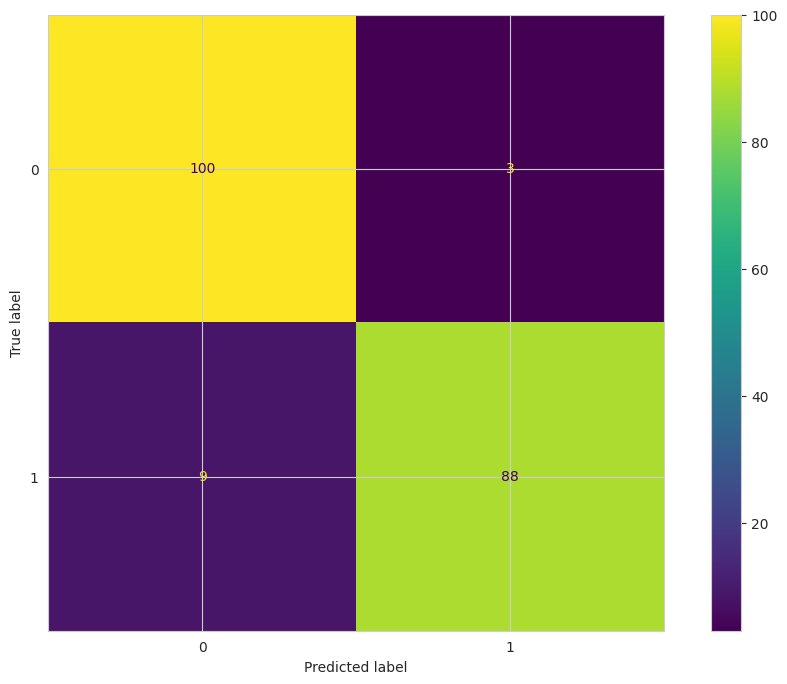

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_kc)).plot();

https://chatgpt.com/s/t_69718bf805808191aef71aeb1af479b2

#**22/1**

# đi về nhà ok hơn ( nhanh hơn - dễ hơn )

Optimizer = Adam (ok nhất ) (Adaptive Moment Estimation )

- mean is 1f moment

- variance is 2sd moment

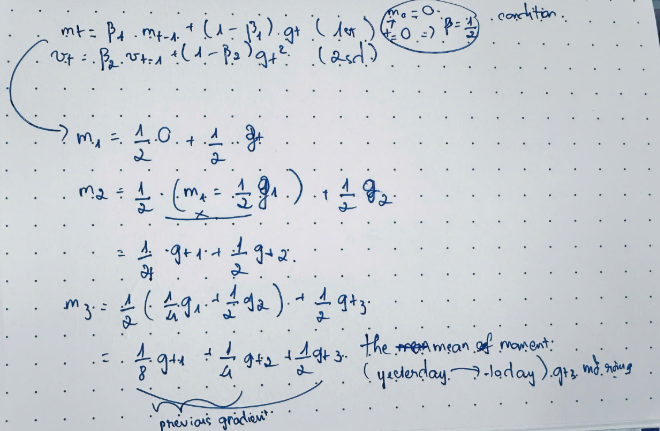

In [ ]:
cost = lambda v: v**2
gradient = lambda v: 2*v

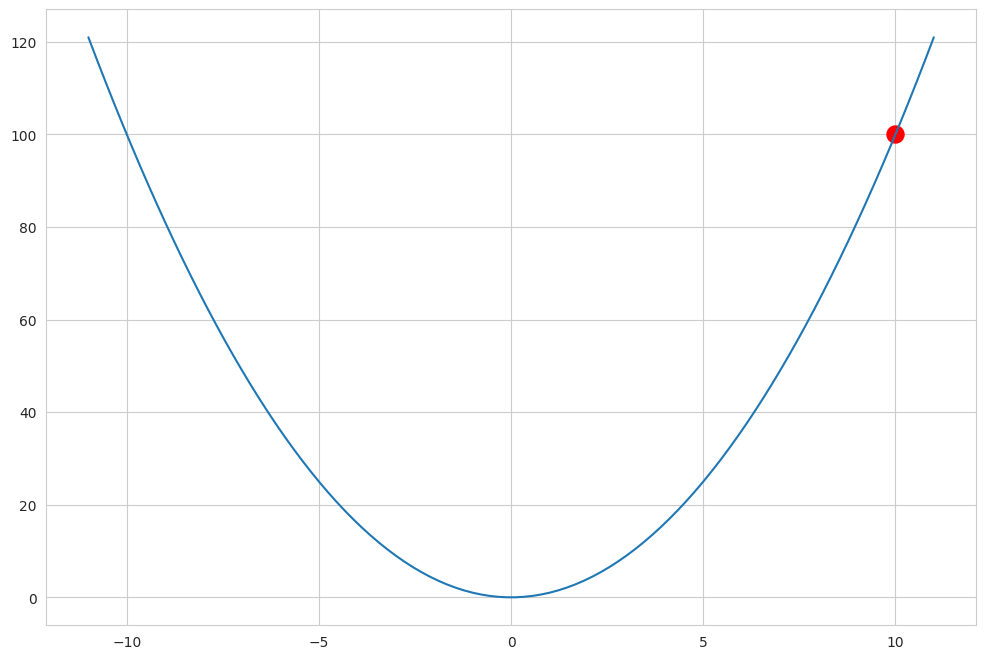

In [ ]:
x = np.linspace (-11,11,100)
plt.plot(x,cost(x));
plt.scatter(10,cost(10),color='r', s= 150);

Đoạn code này mô phỏng cách máy học sửa lỗi từng bước
cost = lambda v: v**2
gradient = lambda v: 2*v

In [ ]:
v = 10
learning_rate = 0.1
track = [v]

for i in range (5):
  v -= learning_rate * gradient(v)
  track.append(v)
track = np.array(track)
print(track)

[10.      8.      6.4     5.12    4.096   3.2768]


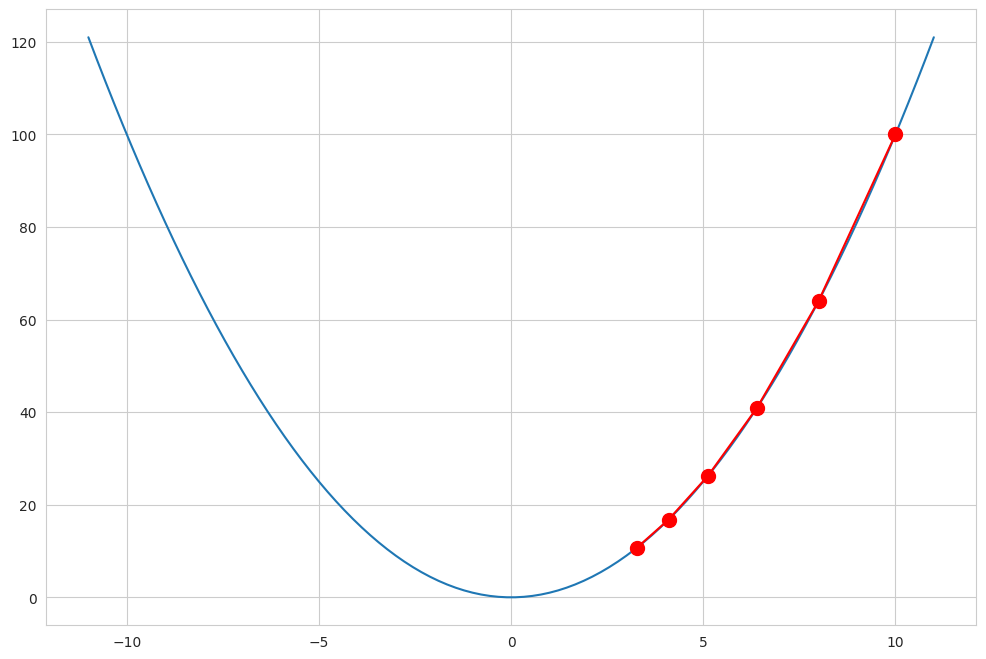

In [ ]:
x = np.linspace (-11,11,100)
plt.plot(x,cost(x));
plt.plot(track ,cost(track),'ro-',markersize=10);

# ngày càng gần

In [ ]:
#Momemtum
mo = 0
v = 10.0
learning_rate = 0.1
track = [v]

for i in range(5):
  mo = 0.5 * mo + learning_rate * gradient(v)
  v -= mo
  track.append(v)

track= np.array(track)
print(track)

#very close home => as fast as possible nhanh hơn cái trên  so efficient

[10.      8.      5.4     3.02    1.226   0.0838]


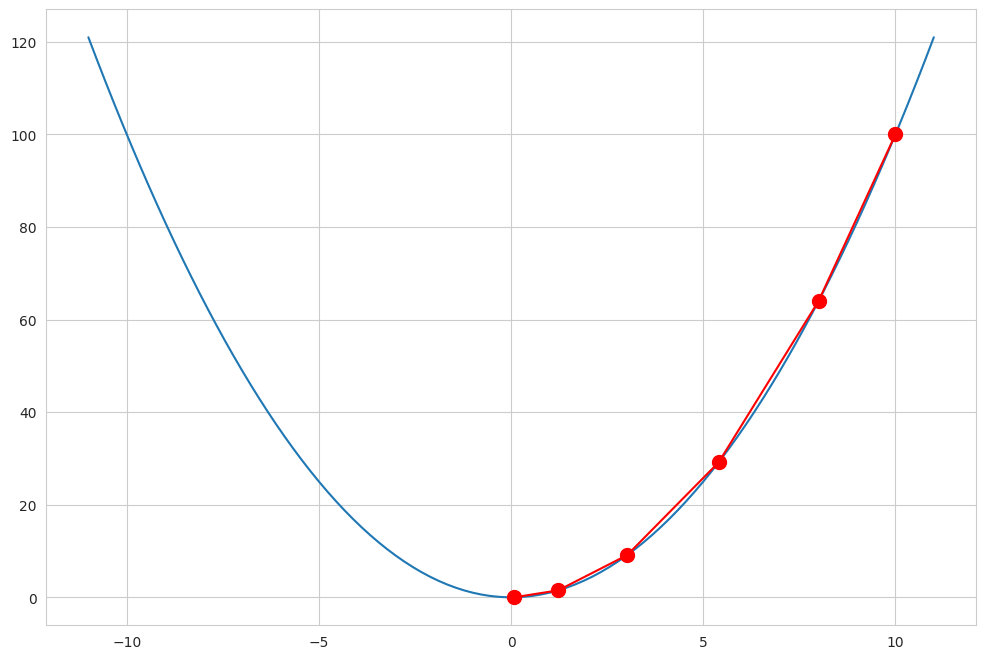

In [ ]:
plt.plot(x,cost(x));
plt.plot(track ,cost(track),'ro-',markersize=10);

Gradient Descent = nhìn hiện tại.
Momentum = nhìn hiện tại + nhớ quá khứ.

tính cho v giống m nhanh ( bi tac dong past )

1️⃣ GRADIENT DESCENT – DÙNG THẾ NÀO?
Khi train model:

Mỗi lần update weight:

Tính gradient từ batch hiện tại

Update ngay weight theo gradient đó

📌 Nghĩa là:

Mỗi batch nói gì → nghe liền

Hậu quả thực tế:

Nếu batch nhiễu:

Gradient đổi hướng

Weight lắc qua lắc lại

Train:

Chậm

Loss giảm không mượt

Khi nào thấy rõ?

Dữ liệu nhiễu

Bài toán nhiều chiều

Neural Network có nhiều layer

2️⃣ MOMENTUM – DÙNG THẾ NÀO?
Khi train model:

Không update weight chỉ theo batch hiện tại

Mà:

Kết hợp gradient hiện tại

với gradient các batch trước

📌 Nghĩa là:

Batch hiện tại chỉ là 1 ý kiến,
còn quyết định dựa trên xu hướng chung

Hậu quả thực tế:

Weight:

Ít lắc

Đi theo 1 hướng ổn định

Train:

Nhanh hơn

Loss giảm mượt


# Learing rate
- Global Learning Rate

In [ ]:
v = np.array([1.5, 10.0])
c_p = 50*v[0]**2+2*v[1]**2
g_p = 100 * v[0] + 2*v[1]

In [ ]:
learning_rate = 0.01
track = [v]

for i in range(5):
    grad = np.array([100 * v[0], 2 * v[1]])
    v = v - learning_rate * grad
    track.append(v)

track = np.array(track)
print(track.round(2))


[[ 1.5  10.  ]
 [ 0.    9.8 ]
 [ 0.    9.6 ]
 [ 0.    9.41]
 [ 0.    9.22]
 [ 0.    9.04]]


# đừng move to fast you gonna be die = high variance  so we need to reduce
and how we change movement

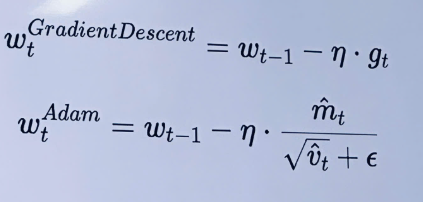

variance small => g bigger

to prevent infinity + e

In [ ]:
learning_rate = 0.5
epsilon = 0.0001
v = np.array([1.5,10.0])

g_squared = np.array([0.0,0.0])
track = [v.copy()]
g_s = [g_squared.copy()]

for i in range(5):
  grad = np.array([100*v[0], 2*v[1]])
  g_squared += grad**2
  adpt_lr = learning_rate /(np.sqrt(g_squared)+epsilon) #wt Adam
  v = v - adpt_lr * grad

  track.append(v.copy())
  g_s.append(g_squared.copy())

track = np.array(track)
g_s = np.array(g_s)
print(track)
print(g_s)

[[ 1.5        10.        ]
 [ 1.00000033  9.5000025 ]
 [ 0.72265033  9.15562897]
 [ 0.53661336  8.87911206]
 [ 0.40345798  8.64279025]
 [ 0.30529227  8.4338135 ]]
[[    0.             0.        ]
 [22500.           400.        ]
 [32500.00666666   761.00019   ]
 [37722.2415898   1096.30235733]
 [40601.78061229  1411.65688103]
 [42229.56402358  1710.44817398]]


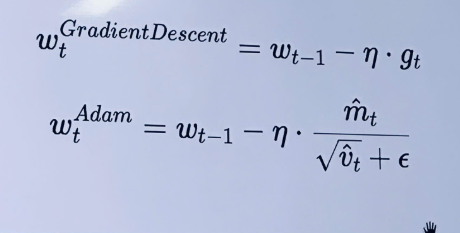

https://chatgpt.com/s/t_69719b6475108191b930166043e02524

#Using pipeline

In [ ]:
X,y = make_classification(
    n_samples = 1000,
    n_features = 20,
    n_informative = 18,
    n_redundant = 2,
    n_classes = 3,
    random_state = 123
)

In [ ]:
y_pred

np.float64(0.6101643612200203)

In [ ]:
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size= 0.2, random_state=123)

# Build the Model

In [ ]:
def create_model(meta):
    n_features = meta["n_features_in_"]
    n_classes = meta["n_classes_"]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(n_features,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(n_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [ ]:
from sklearn.pipeline import Pipeline

ann1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KerasClassifier(
        model=create_model,
        epochs=100,
        batch_size=32,
        verbose=1
    ))
])


In [ ]:
ann1.fit(X_train,y_train);

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5059 - loss: 0.9991
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - loss: 0.5851
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8131 - loss: 0.4494
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8460 - loss: 0.3472
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9027 - loss: 0.2642
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9064 - loss: 0.2541
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9078 - loss: 0.2233
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.1904
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9307 - loss: 0.1795
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9364 - loss: 0.1424
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9435 - loss: 0.1563
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accurac

In [ ]:
y_pred_ann1= ann1.named_steps['model'].predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
np.c_[y_test,y_pred_ann1]


array([[0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 1],
       [0, 0],
       [2, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [2, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0,

In [ ]:
y_pred_ann1 = ann1.named_steps['model'].predict(X_test)
y_pred_prob_ann1 = ann1.named_steps['model'].predict_proba(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


#Evaluate

In [ ]:
ann1.named_steps['model'].score(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


0.825

In [ ]:
print(classification_report(y_test,y_pred_ann1))
confusion_matrix(y_test,y_pred_ann1)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        71
           1       0.85      0.84      0.85        69
           2       0.81      0.77      0.79        60

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



array([[61,  5,  5],
       [ 5, 58,  6],
       [ 9,  5, 46]])

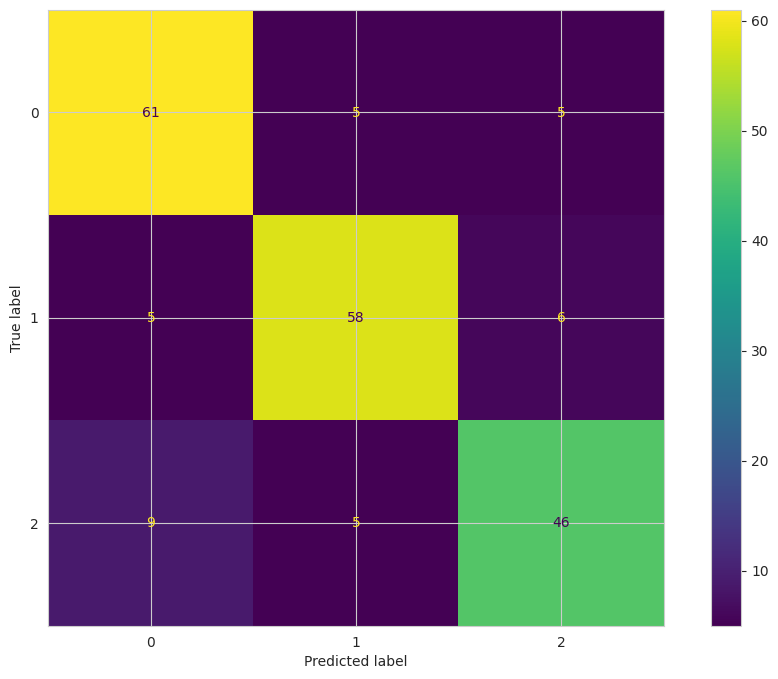

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann1)).plot()

#**HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCH CV**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
!pip install scikeras

In [ ]:
# Generate dataset
X, y = make_classification( # 0,1
n_samples=1000,
n_features=20,
n_informative=18,
n_redundant=2,
n_classes=2,
random_state=123
)


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 123)

In [ ]:
def create_model(meta, n_hidden = 3, n_neurons = 64, learning_rate=0.01):
    n_features = meta["n_features_in_"]

    model = Sequential()
    model.add(Input(shape=(n_features,)))

    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
        model.add(Dropout(0.2))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [ ]:
ann_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KerasClassifier(
        model=create_model,
        epochs=100,
        batch_size=32,
        verbose=0
    ))
])

In [ ]:
ann_pip1 = ann_pipeline.fit(X_train,y_train);

In [ ]:
param_dist = {
    'model_model_n_hidden': [2,4],
    'model_model_n_neurons': [30,50],
    'model_model_learning_rate': [0.05, 0.1],
    'model_batch_size': [20,50],
}

rnd_search = RandomizedSearchCV(estimator= ann_pip1,param_distributions=param_dist,
                                n_iter=5,cv=3,verbose =0)

In [ ]:
ann_pip1.fit(X_train,y_train);

In [ ]:
y_pred = ann_pip1.named_steps['model'].predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       103
           1       0.88      0.87      0.87        97

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [ ]:
#For searching Hyperparameters
param_ann = {
    'model__model__n_hidden': [2, 3],
    'model__batch_size': [16, 32]
}

rnd_search = RandomizedSearchCV(
    estimator=ann_pip1,
    param_distributions=param_ann,
    n_iter=100,
    cv=3,
    verbose=0
)

rnd_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              KerasClassifier(batch_size=32, epochs=100, model=<function create_model at 0x7e047007bce0>, verbose=0))]),
                   n_iter=100,
                   param_distributions={'model__batch_size': [16, 32],
                                        'model__model__n_hidden': [2, 3]})

In [ ]:
print('best parameters', rnd_search.best_params_)

best parameters {'model__model__n_hidden': 2, 'model__batch_size': 16}


In [ ]:
best_model = rnd_search.best_estimator_

In [ ]:
best_model.fit(X_train,y_train); #final version

In [ ]:
y_pred = best_model.named_steps['model'].predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       103
           1       0.86      0.86      0.86        97

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



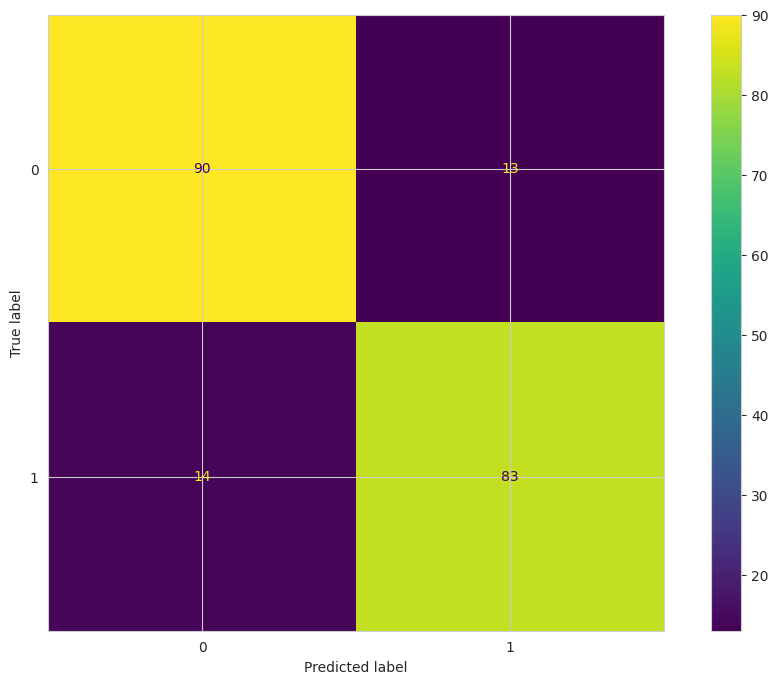

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

#26/1

#USING TITANIC DATASET , BUID ANN MODEL TO PREDICT THE SUVIVAL OF PASSENGER

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scikeras.wrappers import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


#HANDLE MISSING DATA

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df['class'].value_counts() # the probalbility of survive  and age (kid,woman)

,count
class,
Third,491
First,216
Second,184


In [ ]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

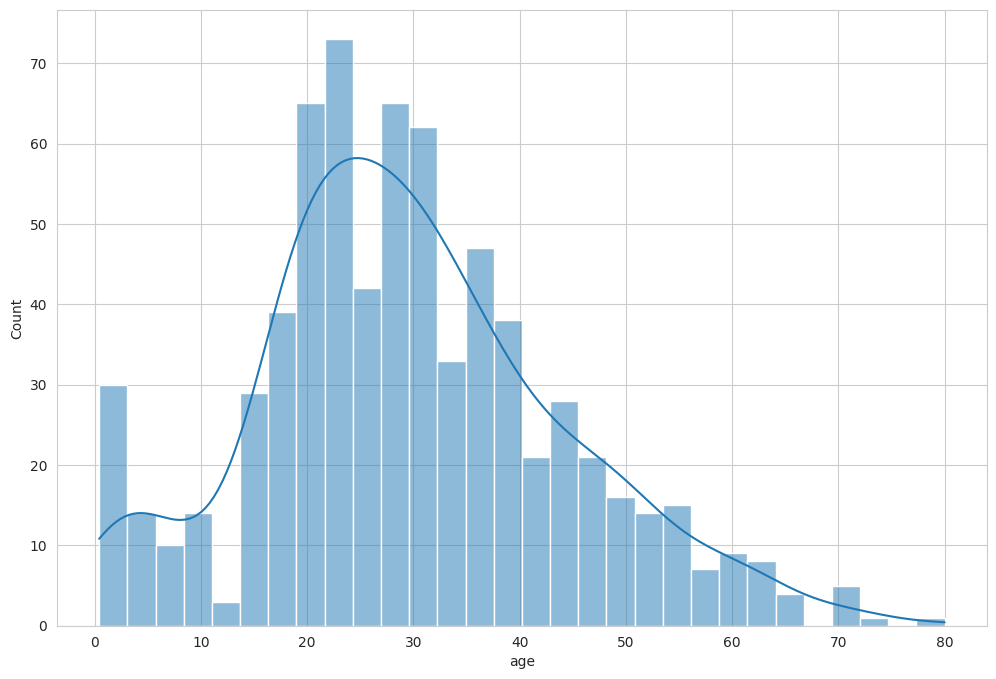

In [ ]:
sns.histplot(df['age'],kde = True, bins = 30)

In [ ]:
df.info()
# we have survive ,class, age number , M/F object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
categorical_features = ['sex','embarked','pclass']
numerical_features = ['age','fare','sibsp','parch']


In [ ]:
X = df[categorical_features + numerical_features]
y = df['survived'] # binary classification
# split the data

In [ ]:
y.value_counts(normalize = True)
# die 61% => data not balance

,proportion
survived,
0,0.616162
1,0.383838


In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 123 ,stratify = y)
# still have missing value ( number of ages )

#USING PIPELINE handle missing value

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# SAVING DATA (missing data)
pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipe_cat = Pipeline([
])

In [ ]:
X_train_num = X_train[numerical_features]
X_train.isna().sum()
# we miss 138 values

,0
sex,0
embarked,2
pclass,0
age,138
fare,0
sibsp,0
parch,0


In [ ]:
pipe_num.fit(X_train_num)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:
pipe_num.named_steps ['imputer'].missing_values #Lấy ra đối tượng SimpleImputer bên trong pipeline

nan

https://www.geeksforgeeks.org/artificial-intelligence/artificial-neural-networks-and-itsapplications/

In [ ]:
X_train_cat = X_train[categorical_features]
X_train_cat.isna().sum()

,0
sex,0
embarked,2
pclass,0


In [ ]:
pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [ ]:
pipe_cat.fit(X_train_cat)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(drop='first'))])

In [ ]:
pipe_cat.named_steps['imputer'].missing_values

nan

In [ ]:
pipe_cat.named_steps ['imputer'].get_feature_names_out()

array(['sex', 'embarked', 'pclass'], dtype=object)

#THE DATA PROCESS

In [ ]:
pre = ColumnTransformer([
    ('num', pipe_num, numerical_features),
    ('cat', pipe_cat, categorical_features)
])


In [ ]:
lr_pipe = Pipeline([
    ('pre', pre),
    ('model', LogisticRegression())
])

In [ ]:
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'embarked',
                                                   'pclass'])])),
                ('model', LogisticRegression())])

In [ ]:
lr_pipe.named_steps['model'].coef_, lr_pipe.named_steps['model'].intercept_

(array([[-0.49840737,  0.15380808, -0.36844249, -0.04952111, -2.59426735,
          0.14727077, -0.37296151, -0.68496878, -1.88977813]]),
 array([2.50153248]))

In [ ]:
#Prediction
y_pred_lr = lr_pipe.predict(X_test)
y_pred_lr

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

In [ ]:
y_pred_lr

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

In [ ]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[97 13]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
def create_model(meta):
  num_features = meta['n_features_in_']
  model = Sequential([
      Dense(64,activation = 'relu', input_shape = (num_features, )),
      Dropout(0.2),
      Dense(32,activation = 'relu'),
      Dropout(0.1),
      Dense(1,activation = 'sigmoid')
  ])
  model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy']
  )
  return model

In [ ]:
t1_ann = KerasClassifier(
    model = create_model,
    epochs = 100,
    batch_size = 32,
    verbose = 0
)

In [ ]:
t1_pipe = Pipeline([
    ('pre',pre),
    ('model',t1_ann)
])

In [ ]:
t1_pipe.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                 

In [ ]:
y_pred_t1 = t1_pipe.named_steps['model'].predict(X_test)

ValueError: could not convert string to float: 'male'

In [ ]:
y_pred_t1